## Importing the required libraries

In [27]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Sequential
from sklearn.metrics import r2_score
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

## Reading the dataset

In [43]:
import pandas as pd

df = pd.read_csv('Dataset-group8.csv')
df.drop(['id', 'Date'], axis=1, inplace=True)
df.head()


,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,grade of the house,Area of the house(excluding basement),...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,5,2.50,3650,9050,2.0,0,4,5,10,3370,...,1921,0,122003,52.8645,-114.557,2880,5400,2,58,2380000
1,4,2.50,2920,4000,1.5,0,0,5,8,1910,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
2,5,2.75,2910,9480,1.5,0,0,3,8,2910,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
3,4,2.50,3310,42998,2.0,0,0,3,9,3310,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
4,3,2.00,2710,4500,1.5,0,0,4,8,1880,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000


### The inference from the dataset is as follows,
* There are 21 features in the given dataset.
* The price column is the only column which depend on the rest of the 20 columns.

## Getting the info of the dataframe

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14620 entries, 0 to 14619
Data columns (total 21 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   number of bedrooms                     14620 non-null  int64  
 1   number of bathrooms                    14620 non-null  float64
 2   living area                            14620 non-null  int64  
 3   lot area                               14620 non-null  int64  
 4   number of floors                       14620 non-null  float64
 5   waterfront present                     14620 non-null  int64  
 6   number of views                        14620 non-null  int64  
 7   condition of the house                 14620 non-null  int64  
 8   grade of the house                     14620 non-null  int64  
 9   Area of the house(excluding basement)  14620 non-null  int64  
 10  Area of the basement                   14620 non-null  int64  
 11  Bu

### The inferrence from the above cell are discussed below,
* Only four columns "number of bathrooms", "number of floors", "Lattitude" and "Longitude" are float datatype.
* Rest of the columns have only int64 datatype.

## Checking the NaN values from the dataframe

In [45]:
df.isna().sum()

number of bedrooms                       0
number of bathrooms                      0
living area                              0
lot area                                 0
number of floors                         0
waterfront present                       0
number of views                          0
condition of the house                   0
grade of the house                       0
Area of the house(excluding basement)    0
Area of the basement                     0
Built Year                               0
Renovation Year                          0
Postal Code                              0
Lattitude                                0
Longitude                                0
living_area_renov                        0
lot_area_renov                           0
Number of schools nearby                 0
Distance from the airport                0
Price                                    0
dtype: int64

### From the above cell it is founded that, 
* There are no NaN values in the given dataset

## Spliting independent and dependent variables as X and y

In [46]:
X = df.drop('Price', axis=1)
y = df['Price']

## Spliting the train test separately

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

### Getting the shape of X, y train and test

In [48]:
print(f'\n shape of X_train - {X_train.shape}\n')
print(f' shape of X_test - {X_test.shape}\n')
print(f' shape of y_train - {y_train.shape}\n')
print(f' shape of y_test - {y_test.shape}\n')


 shape of X_train - (11696, 20)

 shape of X_test - (2924, 20)

 shape of y_train - (11696,)

 shape of y_test - (2924,)



---------------------
## Model building
--------------------

In [49]:
number_of_features = len(X.columns)

model = Sequential()

model.add(layer=Input(shape=number_of_features))

model.add(layer=Dense(units=32, activation='relu'))

model.add(layer=Dense(units=64, activation='relu'))

model.add(layer=Dense(units=128, activation='relu'))

model.add(layer=Dense(units=256, activation='relu'))

model.add(layer=Dense(units=512, activation='relu'))

model.add(layer=Dense(units=1024, activation='relu'))

model.add(layer=Dense(units=2048, activation='relu'))

model.add(layer=Dense(units=256, activation='relu'))

model.add(layer=Dense(units=128, activation='relu'))

model.add(layer=Dense(units=64, activation='relu'))

model.add(layer=Dense(units=32, activation='relu'))

model.add(layer=Dense(units=16, activation='relu'))

model.add(layer=Dense(units=1, activation='linear'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 32)                672       
                                                                 
 dense_27 (Dense)            (None, 64)                2112      
                                                                 
 dense_28 (Dense)            (None, 128)               8320      
                                                                 
 dense_29 (Dense)            (None, 256)               33024     
                                                                 
 dense_30 (Dense)            (None, 512)               131584    
                                                                 
 dense_31 (Dense)            (None, 1024)              525312    
                                                                 
 dense_32 (Dense)            (None, 2048)             

### Compiling the model

In [50]:
model.compile(optimizer='adam', loss='mse', metrics=['mae', 'mape'])

## Model Training

In [52]:
history = model.fit(X_train, y_train, epochs=2)

Epoch 1/2


366/366 [==============================] - 33s 90ms/step - loss: 72546721792.0000 - mae: 180696.1094 - mape: 38.3629
Epoch 2/2
366/366 [==============================] - 36s 99ms/step - loss: 66862534656.0000 - mae: 174738.2812 - mape: 36.6905


### Prediting the unseen dataset

In [53]:
y_pred = model.predict(X_test)

92/92 [==============================] - 1s 9ms/step


In [54]:
y_pred

array([[307856.78],
       [343493.06],
       [408390.62],
       ...,
       [354747.72],
       [291468.4 ],
       [502612.6 ]], dtype=float32)

In [55]:
y_test

12149    640000
13581    650000
11595    325000
2769     373000
7393     355000
          ...  
7362     497000
11132    400000
142      366750
1405     276000
6184     569000
Name: Price, Length: 2924, dtype: int64

## Visual representation of the acutual value vs the predicted value

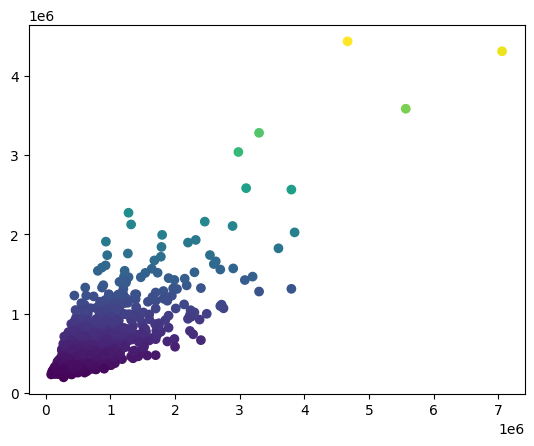

In [56]:
plt.scatter(y_test, y_pred, c=y_pred)
plt.show()

In [57]:
pd.DataFrame({'Actual Value':y_test.values.flatten(), 'Predicted Value':y_pred.flatten()})

,Actual Value,Predicted Value
0,640000,307856.78125
1,650000,343493.06250
2,325000,408390.62500
3,373000,380772.75000
4,355000,505502.93750
...,...,...
2919,497000,474094.28125
2920,400000,335052.25000
2921,366750,354747.71875
2922,276000,291468.40625


### The above cell maps the actual value and the predicted values

In [61]:
r2_score(y_pred=y_pred, y_true=y_test) * 100

59.164842118875896

## Thus the model is trained with ANN and got an accuracy of 66.5%